# BMI565: Bioinformatics Programming & Scripting

#### (C) Michael Mooney (mooneymi@ohsu.edu)

## Week 10: Machine Learning in Python

#### * Thanks to Aaron Coyner for contributing to these slides.

1. Example Dataset
2. Clustering
3. Classification
4. Dimensionality Reduction

#### Requirements

- Python > 3.6
- `numpy` module
- `scikit-learn` module (`conda install scikit-learn`)
- `matplotlib` module
- `pandas` module
- `scipy` module
- `plotly` module (`conda install plotly`)

The `scikit-learn` package contains numerous modules for data mining and data analysis in Python. The modules are built on `numpy`, `scipy`, and `matplotlib`. Below are a few examples of common machine-learning tasks implemented using the `scikit-learn` modules.

In [1]:
import random
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import sklearn as sk
from sklearn import svm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
py.init_notebook_mode(connected=True)

## Example Dataset

In [3]:
## Load the iris dataset
iris = datasets.load_iris()

In [4]:
## The array holding the species ID
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
## The array holding data on sepal length, sepal width, petal length, and petal width 
iris.data.shape

(150, 4)

In [6]:
## Load data into a pandas dataframe
iris_df = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
## Add a column for the species label
iris_df['species'] = pd.Series(iris.target, index=iris_df.index)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
## Add a column for species name
iris_df['species_name'] = pd.Series("", index=iris_df.index)
iris_df.loc[iris_df['species'] == 0, 'species_name'] = 'setosa'
iris_df.loc[iris_df['species'] == 1, 'species_name'] = 'versicolor'
iris_df.loc[iris_df['species'] == 2, 'species_name'] = 'virginica'
iris_df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [9]:
iris_df['species'].shape

(150,)

In [10]:
## Let's initialize a 3D plot
## Now we can visualize our data and see if there are any relationships

plot_data = go.Scatter3d(
    x = iris_df.loc[:,'sepal_length'],
    y = iris_df.loc[:,'sepal_width'],
    z = iris_df.loc[:,'petal_length'],
    mode = 'markers',
    marker = dict(
        size = 12,
        color = iris_df.loc[:,'petal_width'], # set color to our outcome variable
        colorscale = 'Viridis',    # choose a colorscale
        colorbar = dict(
            title = 'Petal Width [cm]'
        ),
        opacity = 0.8
    )
)

plot_data = [plot_data]

plot_layout = go.Layout(
    margin = dict(
        l = 0,
        r = 0,
        b = 0,
        t = 0
    ),
    scene = dict(
        xaxis = dict(title = 'Sepal Length'),
        yaxis = dict(title = 'Sepal Width'),
        zaxis = dict(title = 'Petal Length')
    )
)

fig = go.Figure(data = plot_data, layout = plot_layout)
py.iplot(fig)

## Clustering

Clustering is common task in data mining, whereby entities are grouped so that they are more "similar" to other members of the same group than to members of other groups. As we can see in the 3D plot above, there seem to be clusters of data.

`Scikit-learn` includes a number of clustering algorithms, including:
- K-means clustering
- Affinity Propogation
- Hierarchical clustering
- Spectral clustering

We'll walk through an example of K-means clustering. The objective of this clustering algorithm is to partition data elements so that the within-cluster sum of squares (the squared difference between individual data points and the cluster's mean) is minimized.

[http://en.wikipedia.org/wiki/K-means_clustering](http://en.wikipedia.org/wiki/K-means_clustering)

[http://scikit-learn.org/stable/modules/clustering.html#k-means](http://scikit-learn.org/stable/modules/clustering.html#k-means)

In [11]:
## Perform K-means clustering on the iris data
iris_clust = KMeans(n_clusters=3)
iris_clust.fit(iris_df[['sepal_length','sepal_width','petal_length','petal_width']])

KMeans(n_clusters=3)

In [12]:
## View the predicted clusters
iris_clust.predict(iris_df[['sepal_length','sepal_width','petal_length','petal_width']])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [13]:
## Add predicted clusters to the dataframe
iris_df['predicted_clust'] = pd.Series(iris_clust.predict(iris_df[['sepal_length','sepal_width','petal_length','petal_width']]), index=iris_df.index)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_name,predicted_clust
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


In [14]:
## Compare true and predicted classes
iris_df.groupby(['species','predicted_clust']).size()

species  predicted_clust
0        1                  50
1        0                  48
         2                   2
2        0                  14
         2                  36
dtype: int64

In [15]:
## The pivot_table method could also be used here
iris_df[['species','predicted_clust']].pivot_table(index='species', columns='predicted_clust', aggfunc='size')

predicted_clust,0,1,2
species,,,
0,NaN,50.0,NaN
1,48.0,NaN,2.0
2,14.0,NaN,36.0


In [16]:
## Or crosstab
pd.crosstab(iris_df.species, iris_df.predicted_clust)

predicted_clust,0,1,2
species,,,
0,0,50,0
1,48,0,2
2,14,0,36


In [17]:
## Simple function to identify correct species assignment
def align_classes(true_val):
    """
    This function takes a species label and returns the associated cluster ID
    """
    return iris_df['predicted_clust'][iris_df['species'] == true_val].value_counts().idxmax()

In [18]:
align_classes(0)

1

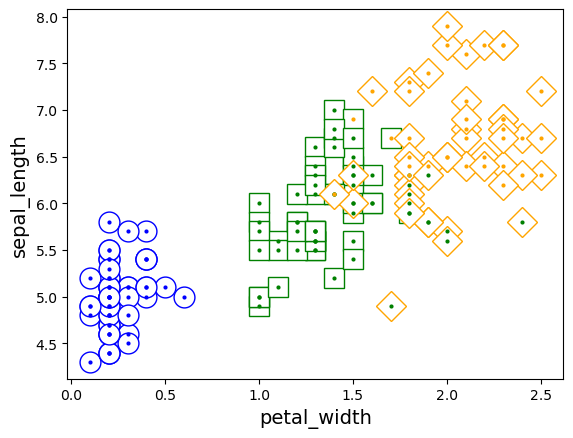

In [19]:
## Plot the clusters
colors = ['blue','green','orange']
shapes = ['o', 's', 'D']
xval = 'petal_width'
yval = 'sepal_length'
fig = plt.figure()

## Plot true species
for k in range(3):
    idx1 = iris_df['species'] == k
    plt.plot(iris_df[idx1][xval], iris_df[idx1][yval], ' ', markeredgecolor=colors[k], markerfacecolor='w', markersize=15, marker=shapes[k])

## Plot predicted species
for j in range(3):
    pred_k = align_classes(j)
    idx2 = iris_df['predicted_clust'] == pred_k
    plt.plot(iris_df[idx2][xval], iris_df[idx2][yval], ' ', markerfacecolor=colors[j], marker='.', markeredgewidth=0)
plt.xlabel(xval, fontsize=14)
plt.ylabel(yval, fontsize=14)
fig.savefig('iris_clusters.pdf')

## Classification

Classification is a supervised-learning technique used to identify the correct class to which a new (unseen) data point belongs. This class assignment is based on a model built from training data which contains known class labels. Many problems in biomedicine are classification problems, such as predicting whether or not a patient will respond to a particular drug.

`Scikit-learn` includes a number of classification algorithms, including:
- Nearest neighbors
- Random Forests
- Decision Trees
- Naive Bayes

In [20]:
## Subset iris dataframe to include only two species
iris_df2 = iris_df.loc[(iris_df['species'] == 1) | (iris_df['species'] == 2)].copy()

## Create training and test datasets
train_idx = random.sample(iris_df2.index.tolist(), int(len(iris_df2)/2))
test_idx = list(set(iris_df2.index) - set(train_idx))

iris_training = iris_df2.loc[train_idx]
iris_test = iris_df2.loc[test_idx]
iris_training.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_name,predicted_clust
123,6.3,2.7,4.9,1.8,2,virginica,0
127,6.1,3.0,4.9,1.8,2,virginica,0
149,5.9,3.0,5.1,1.8,2,virginica,0
63,6.1,2.9,4.7,1.4,1,versicolor,0
122,7.7,2.8,6.7,2.0,2,virginica,2


### Logistic Regression

>Logistic Regression is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

[Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

[scikit-learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [21]:
## We will use only two variables, sepal.length and petal.length, for our classifier
logreg_model = LogisticRegression(solver = 'liblinear')
logreg_model.fit(iris_training[['sepal_length','petal_length']], iris_training['species'])

LogisticRegression(solver='liblinear')

In [22]:
logreg_pred = logreg_model.predict(iris_test[['sepal_length','petal_length']])
logreg_pred

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1])

In [23]:
## Add predicted classes to the dataframe
iris_test['logreg_predicted'] = pd.Series(logreg_pred, index=iris_test.index)
iris_test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_name,predicted_clust,logreg_predicted
129,7.2,3.0,5.8,1.6,2,virginica,2,2
130,7.4,2.8,6.1,1.9,2,virginica,2,2
131,7.9,3.8,6.4,2.0,2,virginica,2,2
132,6.4,2.8,5.6,2.2,2,virginica,2,2
134,6.1,2.6,5.6,1.4,2,virginica,2,2


In [24]:
pd.crosstab(iris_test.species, iris_test.logreg_predicted)

logreg_predicted,1,2
species,,
1,20,3
2,3,24


### Support Vector Machines

A support vector machine (SVM) is a method for classifying data by identifying a hyperplane which divides the data into two classes. The hyperplane is selected to maximize the margin between the separating boundary and the training data. 

[Wikipedia](http://en.wikipedia.org/wiki/Support_vector_machine)

[scikit-learn Documentation](http://scikit-learn.org/stable/modules/svm.html#svm)

In [25]:
## Set kernel type ('linear', 'poly', or 'rbf'), and run SVM
## We will use only two variables, sepal.length and petal.length, for our classifier
kernel_type = "linear"
svm_model = svm.SVC(kernel=kernel_type, C=1000)
svm_model.fit(iris_training[['sepal_length','petal_length']], iris_training['species'])

SVC(C=1000, kernel='linear')

In [26]:
## View the predicted classes for the test data
svm_model.predict(iris_test[['sepal_length','petal_length']])

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1])

In [27]:
## Add predicted classes to the dataframe
iris_test['svm_predicted'] = pd.Series(svm_model.predict(iris_test[['sepal_length','petal_length']]), index=iris_test.index)
iris_test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_name,predicted_clust,logreg_predicted,svm_predicted
129,7.2,3.0,5.8,1.6,2,virginica,2,2,2
130,7.4,2.8,6.1,1.9,2,virginica,2,2,2
131,7.9,3.8,6.4,2.0,2,virginica,2,2,2
132,6.4,2.8,5.6,2.2,2,virginica,2,2,2
134,6.1,2.6,5.6,1.4,2,virginica,2,2,2


In [28]:
pd.crosstab(iris_test.species, iris_test.svm_predicted)

svm_predicted,1,2
species,,
1,20,3
2,2,25


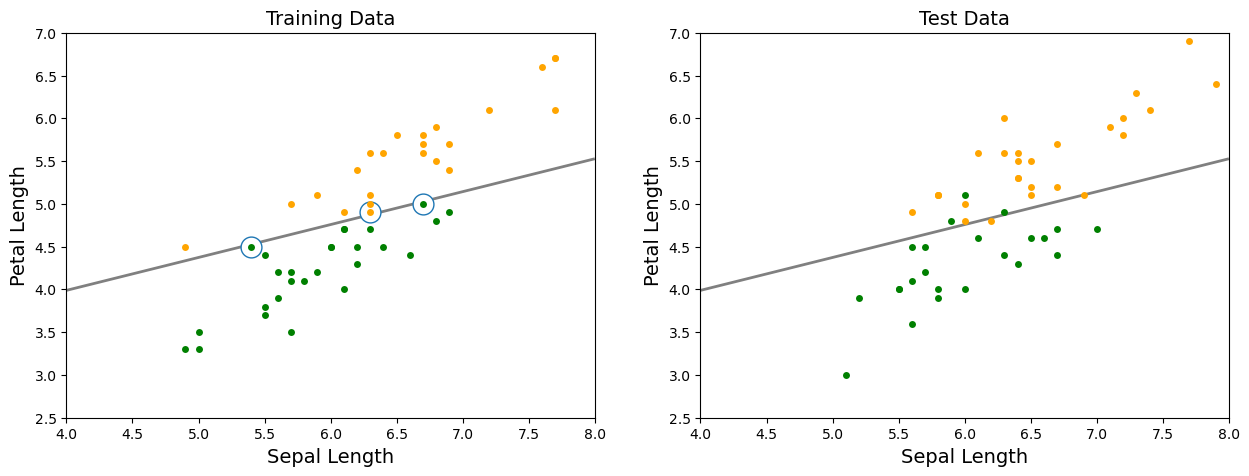

In [29]:
## The code below was adapted from the scikit-learn webiste:
## http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
## http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

## Plot the SVM results
fig = plt.figure(figsize=(15,5))

## Create subplot for the training data
plt.subplot(1, 2, 1)
## Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(4, 8, 50),np.linspace(2.5, 7, 50))
Z = svm_model.decision_function(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['sepal_length','petal_length']))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="gray")

## Plot the data points for the training data
plt.plot(svm_model.support_vectors_[:,0], svm_model.support_vectors_[:,1], ' ', marker='o', markersize=15, markerfacecolor='w')
plt.plot(iris_training[iris_training['species'] == 1]['sepal_length'], iris_training[iris_training['species'] == 1]['petal_length'], ' ', markerfacecolor='green', marker='.', markersize=10, markeredgewidth=0)
plt.plot(iris_training[iris_training['species'] == 2]['sepal_length'], iris_training[iris_training['species'] == 2]['petal_length'], ' ', markerfacecolor='orange', marker='.', markersize=10, markeredgewidth=0)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Petal Length', fontsize=14)
plt.title("Training Data", fontsize=14)

## Create subplot for the test data
plt.subplot(1, 2, 2)
## Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(4, 8, 50),np.linspace(2.5, 7, 50))
Z = svm_model.decision_function(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['sepal_length','petal_length']))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="gray")

## Plot the data points for the test data
plt.plot(iris_test[iris_test['species'] == 1]['sepal_length'], iris_test[iris_test['species'] == 1]['petal_length'], ' ', markerfacecolor='green', marker='.', markersize=10, markeredgewidth=0)
plt.plot(iris_test[iris_test['species'] == 2]['sepal_length'], iris_test[iris_test['species'] == 2]['petal_length'], ' ', markerfacecolor='orange', marker='.', markersize=10, markeredgewidth=0)
plt.xlabel('Sepal Length', fontsize=14)
plt.ylabel('Petal Length', fontsize=14)
plt.title("Test Data", fontsize=14);

## Dimensionality Reduction

Principal Component Analysis (PCA) is a technique used in exploratory data analysis to transform a set of correlated variables into a set of uncorrelated variables called principal components (PC). The transformation is done so that the first PC accounts for the largest amount of variance in the data. Each successive PC accounts for the largest amount of variance orthogonal (i.e. uncorrelated) to the preceeding PCs. Because of this feature, PCA is often used for dimensionality reduction (reducing the number of variables considered in an analysis).  

[http://en.wikipedia.org/wiki/Principal_component_analysis](http://en.wikipedia.org/wiki/Principal_component_analysis)

[http://scikit-learn.org/stable/modules/decomposition.html#pca](http://scikit-learn.org/stable/modules/decomposition.html#pca)

In [30]:
iris_df.groupby(['species','species_name']).size()

species  species_name
0        setosa          50
1        versicolor      50
2        virginica       50
dtype: int64

In [31]:
X = iris_df.loc[:,['sepal_length','sepal_width','petal_length','petal_width']].copy()
Y = iris_df.loc[:,'species'].copy()
species_names = list(iris_df['species_name'].value_counts().index)

pca = PCA()
X_transformed = pca.fit(X).transform(X)

In [32]:
X_transformed[0:5,]

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02]])

In [33]:
## Proportion of explained variance
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [34]:
list(zip("rgb", [0, 1, 2], species_names))

[('r', 0, 'setosa'), ('g', 1, 'versicolor'), ('b', 2, 'virginica')]

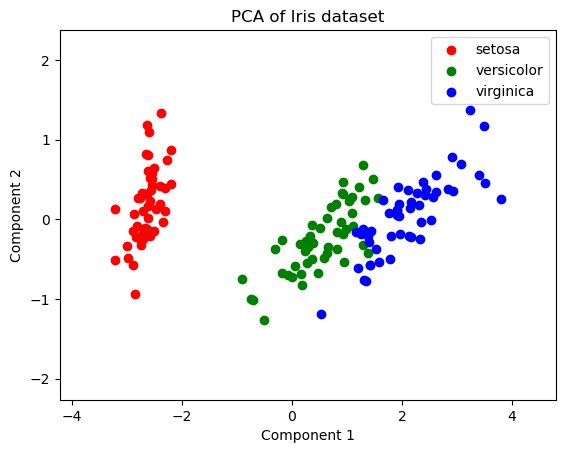

In [35]:
## Plot the first PC versus the second
fig = plt.figure()
for c, i, name in zip("rgb", [0, 1, 2], species_names):
    plt.scatter(X_transformed[Y.values == i, 0], X_transformed[Y.values == i, 1], c=c, label=name)

plt.xlim(np.min(X_transformed[:,0])-1, np.max(X_transformed[:,0])+1)
plt.ylim(np.min(X_transformed[:,1])-1, np.max(X_transformed[:,1])+1)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.title('PCA of Iris dataset');

## In-Class Exercises

In [ ]:
## Exercise 1.
## Identify which variable is most correlated with the first PCA component
## Use scipy.stats.pearsonr()
##


In [ ]:
## Exercise 2.
## Choose a few different parameter values for the SVM 
## Use the Pandas groupby method to calculate the 
## accuracy of the different classifiers
##


In [ ]:
## Exercise 3.
## Use the first two PCs from the PCA analysis to build an SVM
##


The `LogisticRegression()` function uses an L2 Penalty term – this is known as Ridge Regression. However, you can also use an L1 Penalty term – also known as Lasso Regression.

The key difference between these techniques is that Lasso Regression shrinks less important features' coefficients to zero, thereby removing them features altogether. This works well for feature selection in cases where we have a huge number of features.

In [ ]:
## Exercise 4.
## Perform Lasso Regression by setting penalty = 'l1'
## Compare the performance of this model to the model created earlier that uses Ridge Regression


## References

- Python for Bioinformatics, Sebastian Bassi, CRC Press (2010)
- [http://scikit-learn.org/stable/index.html](http://scikit-learn.org/stable/index.html)

#### Last Updated: 20-Sep-2022